# Importing Libraries

In [2]:
import pandas as pd

# Reading Data

In [3]:
dataset_url = '/content/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6893,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.293282
6894,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.386158
6895,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.403403
6896,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.204120


In [4]:
dataset = dataset.dropna()

In [5]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6893,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6894,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6895,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6896,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y = dataset.iloc[:,-1]
Y

,pIC50
0,6.124939
1,7.000000
2,4.301030
3,6.522879
4,6.096910
...,...
6893,5.293282
6894,6.386158
6895,6.403403
6896,6.204120


# Remove low Variance features

In [7]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP37,PubchemFP143,...,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,1,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6893,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6894,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6895,1,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6896,1,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
X.to_csv('descriptor_list.csv', index = False)

# Training Model

In [9]:
from sklearn.tree import ExtraTreeRegressor
from sklearn.metrics import r2_score

In [10]:
from sklearn.model_selection import train_test_split

In [21]:
model = ExtraTreeRegressor(random_state=42)

In [22]:
model.fit(X, Y)

ExtraTreeRegressor(random_state=42)

# Model Evaluation

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
Y_pred = model.predict(X)
Y_pred

array([6.12493874, 7.        , 4.81864399, ..., 6.4034029 , 6.20411998,
       6.49485002])

In [25]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.11
Coefficient of determination (R^2): 0.95


# Data Visualization

In [26]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

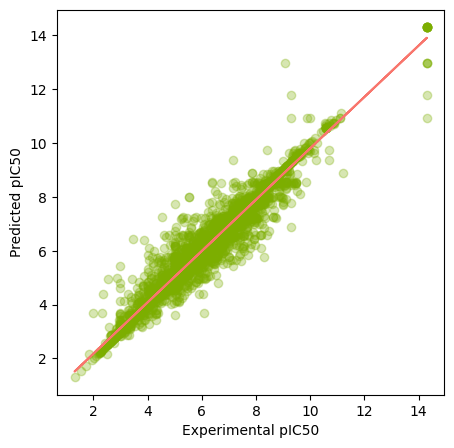

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

In [28]:
import pickle

In [29]:
pickle.dump(model, open('acetylcholinesterase_model.pkl', 'wb'))